### Libraries

In [1]:
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

### Step : 1 Load the dataset

In [2]:
df = pd.read_csv("spam.csv") 

In [3]:
print(df.columns)

Index(['Category', 'Message'], dtype='object')


In [4]:
print(df.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


##### Adjust column names based on your dataset

In [5]:
df['label'] = df['Category'].map({'ham': 0, 'spam': 1}) 
df['message'] = df['Message'] 

In [6]:
df

,Category,Message,label,message
0,ham,"Go until jurong point, crazy.. Available only ...",0,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,0,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,0,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?,0,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s...",0,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...,0,The guy did some bitching but I acted like i'd...


#####  Text preprocessing function

In [7]:
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text) 
    text = re.sub(r"\d+", "", text)  
    text = re.sub(r"\s+", " ", text).strip()  
    return text

##### Apply cleaning function

In [8]:
df['message'] = df['message'].apply(clean_text)

##### Split dataset into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

### Step : 2 Vectorize the text using TF-IDF

In [10]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

print("Data Preprocessing and Vectorization Complete!")

Data Preprocessing and Vectorization Complete!


### Step : 3 Model Training

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.83      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



##### Save the model and vectorizer

### Step : 4 Exploratory Data Analysis (EDA)

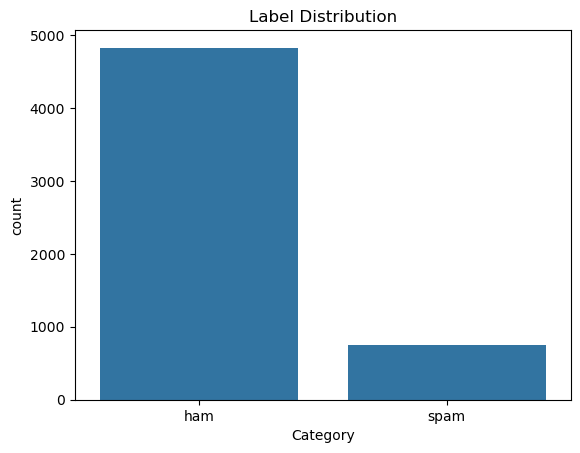

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the label distribution
sns.countplot(data=df, x='Category')
plt.title("Label Distribution")
plt.show()


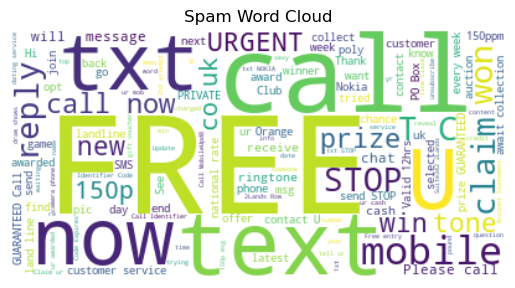

In [13]:
# Example word cloud for spam messages
from wordcloud import WordCloud

spam_text = " ".join(df[df['Category'] == 'spam']['Message'])
wordcloud = WordCloud(background_color='white').generate(spam_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Spam Word Cloud")
plt.show()


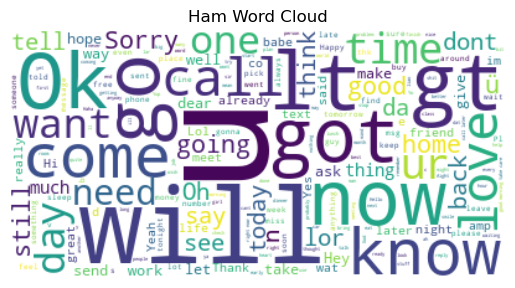

In [14]:
# Example word cloud for spam messages
from wordcloud import WordCloud

spam_text = " ".join(df[df['Category'] == 'ham']['Message'])
wordcloud = WordCloud(background_color='white').generate(spam_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ham Word Cloud")
plt.show()


In [15]:
import joblib

joblib.dump(model, "spam_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']